## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata_df = pd.DataFrame(mouse_metadata, columns=["Mouse ID", "Drug Regimen", "Sex", "Age_months", "Weight (g)"])
study_results_df = pd.DataFrame(study_results, columns=["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"])
merged_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID")

# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
totalmicecount = merged_df["Mouse ID"].nunique()
totalmicecount

249

In [3]:
## Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Add a concatenated value to the list
merged_df["Concat"] = merged_df["Mouse ID"] + "-" + merged_df["Timepoint"].astype(str)
merged_df

# Count the total number of concatenated values
concatmouse = merged_df["Concat"].value_counts() > 1
concatmouse.head(10)


g989-15     True
g989-5      True
g989-0      True
g989-20     True
g989-10     True
d251-45    False
r811-5     False
j755-10    False
y793-5     False
j989-0     False
Name: Concat, dtype: bool

In [4]:
## Optional: Get all the data for the duplicate mouse ID.

# Amend query to look at the 'dirty' mouse
dirty_mouse = merged_df[merged_df['Mouse ID'] == 'g989']
dirty_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Concat
908,g989,Propriva,Female,21,26,0,45.000000,0,g989-0
909,g989,Propriva,Female,21,26,0,45.000000,0,g989-0
910,g989,Propriva,Female,21,26,5,48.786801,0,g989-5
911,g989,Propriva,Female,21,26,5,47.570392,0,g989-5
912,g989,Propriva,Female,21,26,10,51.745156,0,g989-10
913,g989,Propriva,Female,21,26,10,49.880528,0,g989-10
914,g989,Propriva,Female,21,26,15,51.325852,1,g989-15
915,g989,Propriva,Female,21,26,15,53.442020,0,g989-15
916,g989,Propriva,Female,21,26,20,55.326122,1,g989-20
917,g989,Propriva,Female,21,26,20,54.657650,1,g989-20


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Remove the duplicated mouse from the data (Mouse ID = g989)
clean_mouse_data = merged_df[merged_df['Mouse ID'] != 'g989']
clean_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Concat
0,k403,Ramicane,Male,21,16,0,45.000000,0,k403-0
1,k403,Ramicane,Male,21,16,5,38.825898,0,k403-5
2,k403,Ramicane,Male,21,16,10,35.014271,1,k403-10
3,k403,Ramicane,Male,21,16,15,34.223992,1,k403-15
4,k403,Ramicane,Male,21,16,20,32.997729,1,k403-20
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z969-25
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z969-30
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z969-35
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z969-40


In [6]:
# Confirm Clean mice count Present Revised Mouse Data
revisedmicecount = clean_mouse_data["Mouse ID"].nunique()
revisedmicecount

248

In [7]:
# Checking the number of mice in the clean DataFrame.
revisedmicecount = clean_mouse_data["Mouse ID"].nunique()
revisedmicecount

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Calculate all variables
# mean_tumorvol = GroupBy.median(clean_mouse_data["Tumor Volume (mm3)"])

mean_tumorvol = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumorvol = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
var_tumorvol = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
stdev_tumorvol = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_tumorvol = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Create the grouping for drug reigmen
drug_regimen = clean_mouse_data["Drug Regimen"].value_counts()

# Create the dataframe for summary statistics 
tumorvol_summarystats = pd.DataFrame(
    {#"Drug Regimen": drug_regimen,
     "Mean": mean_tumorvol,
     "Median": median_tumorvol,
     "Variance": var_tumorvol,
     "St. Dev.": stdev_tumorvol,
     "SEM": sem_tumorvol
    }
)   
tumorvol_summarystats

# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean,Median,Variance,St. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#####wtf this is? 

clean_mouse_data.describe


clean_mouse_data.describe.groupby(clean_mouse_data["Drug Regimen"])

clean_mouse_data.describe
# This method produces everything in a single groupby function


AttributeError: 'function' object has no attribute 'groupby'

## Bar and Pie Charts

<BarContainer object of 1880 artists>

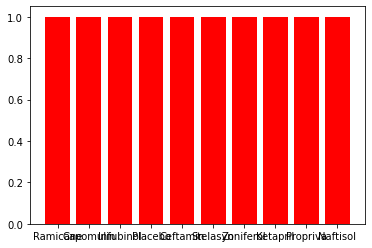

In [27]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 




#revisedmouseid = clean_mouse_data["Mouse ID"].groupby(["Drug Regimen"]).count()

plt.bar(clean_mouse_data["Drug Regimen"], 1, color='r', alpha=0.5, align="center")


In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
